In [9]:
from pylab import *
%matplotlib inline

# Intentando con la ec

In [10]:
def ec1(x,t):
    dx = x[1]
    du = -(0.5)*x[1] - sin(x[0]) + exp(-t)*sin(3*t)
    return array([dx,du])

In [11]:
ec1([1,1],0)

array([ 1.        , -1.34147098])

In [12]:
def integra3(ec,p_ini,x,h=0.1):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    for i in xrange(len(tiempos)-1):
        k=h*ec(sol[i,:],tiempos[i])
        sol[i+1,:] = sol[i,:] + h*ec(sol[i,:]+0.5*k,tiempos[i]+0.5*h)
        
    return tiempos,sol

In [13]:
integra3(ec1,[0,1],50)

TypeError: 'int' object has no attribute '__getitem__'

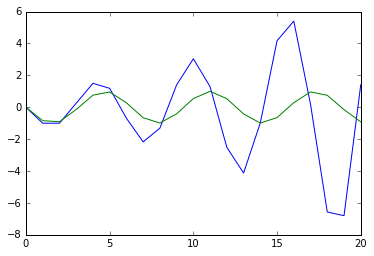

In [24]:
def prueba(y,t):
    return array([y[1],-y[0]])

t,y=integra3(prueba,[1,0],[0,20],1)
plot(t,y[:,1],t,-sin(t))

# Euler

In [14]:
def euler(func,p_ini,t,h=0.1):
    tiempos = arange(t[0],t[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini 
    for i in xrange(len(tiempos)-1):
        sol[i+1,:] = sol[i,:] + func(sol[i,:],tiempos[i])*h
    return tiempos,sol

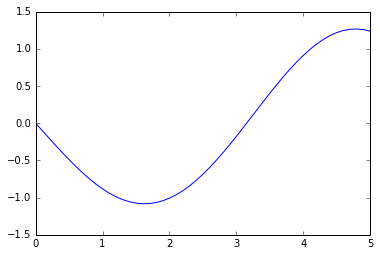

In [7]:
def mi_ec_dif(y,t):   
    return array([y[1],-y[0]])

t,sol = euler(mi_ec_dif,[1,0],[0,5])
plot(t,sol[:,1])

In [76]:
def mi_ec_dif2(y,t):   
    return array([y[1],-y[0]])

print mi_ec_dif2(y,t)

[1 0]


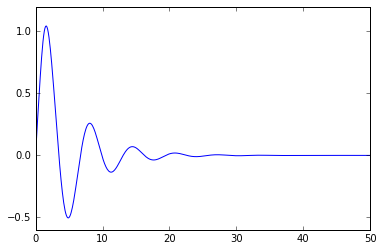

In [15]:
def mi_ec_dif(y,t):   
    return array([y[1],-y[0]])

t,sol = euler(ec1,[0,1],[0,50])
plot(t,sol[:,0])

# Taylor 2

In [2]:
def swifty(ec,d_f,p_ini,t,h=0.1):
    tiemp = arange(t[0],t[1]+h,h)
    sol = zeros((len(tiemp),len(p_ini)))
    sol[0,:] = p_ini 
    for i in xrange(len(tiemp)-1):
        f = ec(sol[i,:],tiemp[i])
        dv,jac = d_f(sol[i,:],tiemp[i])
        sol[i+1,:] = sol[i,:] + f*h + 0.5*h*h*( dot(f,jac) + dv)
    return tiemp,sol

In [6]:
def d_ec1(x,t):
    return array([0,exp(-t)*cos(3*t)-t*exp(-t)*sin(3*t)]),array([[0,1],[-cos(x[0]),-0.5]])

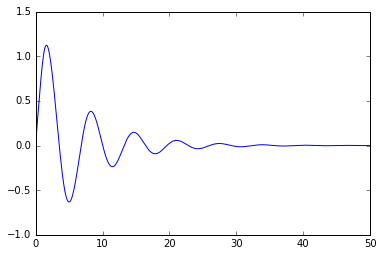

In [7]:
t,sol = swifty(ec1,d_ec1,[0,1],[0,50])
plot(t,sol[:,0])

# Runge-Kutta 2

In [25]:
def rk2(ec,p_ini,t,h=0.1):
    tiemp = arange(t[0],t[1]+h,h)
    sol = zeros((len(tiemp),len(p_ini)))
    sol[0,:] = p_ini
    for i in xrange(len(tiemp)-1):
        k = h*ec(sol[i,:],tiemp[i])
        sol[i+1,:] = sol[i,:] + h*ec(sol[i,:]+0.5*k,tiemp[i]+0.5*h)
    return tiemp,sol

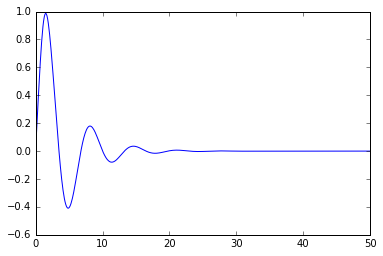

In [19]:
t,sol = rk2(ec1,[0,1],[0,50])
plot(t,sol[:,0])
show()

# Rk4

In [24]:
def rk4(ec,p_ini,x,h=0.1):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    for i in xrange(len(tiempos)-1):
        k1 = ec(sol[i,:],tiempos[i])
        k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
        k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
        k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
        sol[i+1,:] = sol[i,:] + (h/6.)*(k1+2*k2+2*k3+k4)
        
    return tiempos,sol

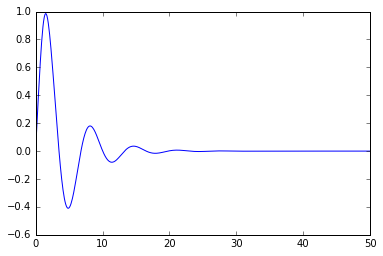

In [21]:
t,sol = rk4(ec1,[0,1],[0,50])
plot(t,sol[:,0])

/
/

# Duo

/
/


In [15]:
def ec2(x,t):
    dx = x[1]
    dv = x[2]
    du = -x[2]**2 + 3*(x[1]**3) - (cos(x[0]))**2 + exp(-t)*sin(3*t)
    return array([dx,dv,du])

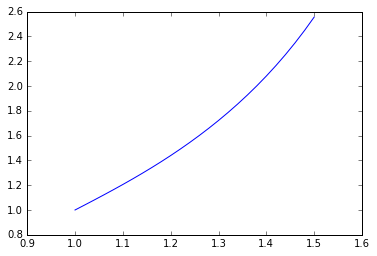

In [20]:
t,sol = euler(ec2,[1,2,1],[1,1.5],0.02)
plot(t,sol[:,0])

In [17]:
def d_ec2(x,t):
    return array([0,0,exp(-t)*cos(3*t)-t*exp(-t)*sin(3*t)]),array([[0,1,0],[0,0,1],[2*cos(x[0])*sin(x[0]),9*(x[1]**2),-2*x[2]]])

C:\Users\Javier\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: overflow encountered in double_scalars
C:\Users\Javier\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: invalid value encountered in double_scalars


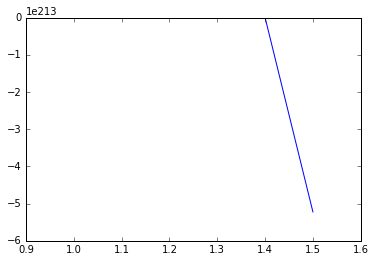

In [23]:
t,sol = swifty(ec2,d_ec2,[1,2,1],[1,1.5],0.1)
plot(t,sol[:,0])

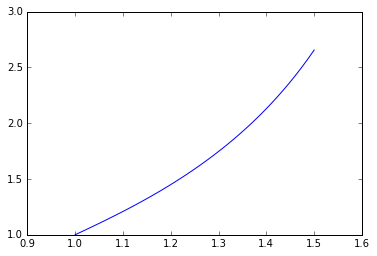

In [30]:
t,sol = rk2(ec2,[1,2,1],[1,1.5],0.01)
plot(t,sol[:,0])

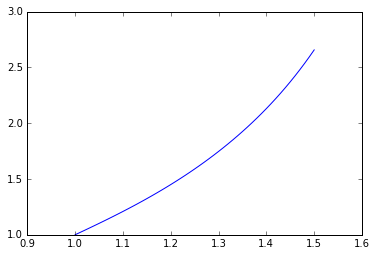

In [28]:
t,sol = rk4(ec2,[1,2,1],[1,1.5],0.01)
plot(t,sol[:,0])

In [194]:
h=0.1
tiempos = arange(1,2+h,h)
sol = odeint(ec2,[1,2,1],tiempos)
plot(sol[:,0],sol[:,1])

NameError: name 'odeint' is not defined

//

# Troa

//

In [44]:
def euler_a(func,p_ini,t,arg=0,h=0.1):
    tiempos = arange(t[0],t[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    if arg==0:
        for i in xrange(len(tiempos)-1):
            sol[i+1,:] = sol[i,:] + func(sol[i,:],tiempos[i])*h
    else:
        for i in xrange(len(tiempos)-1):
            sol[i+1,:] = sol[i,:] + func(sol[i,:],tiempos[i],arg)*h
    return tiempos,sol

In [63]:
def swifty_a(ec,d_f,p_ini,t,arg=0,h=0.1):
    tiemp = arange(t[0],t[1]+h,h)
    sol = zeros((len(tiemp),len(p_ini)))
    sol[0,:] = p_ini 
    if arg==0:
        for i in xrange(len(tiemp)-1):
            f = ec(sol[i,:],tiemp[i])
            dv,jac = d_f(sol[i,:],tiemp[i])
            sol[i+1,:] = sol[i,:] + f*h + 0.5*h*h*( dot(f,jac) + dv)
    else:
        for i in xrange(len(tiemp)-1):
            f = ec(sol[i,:],tiemp[i],arg)
            dv,jac = d_f(sol[i,:],tiemp[i])
            sol[i+1,:] = sol[i,:] + f*h + 0.5*h*h*( dot(f,jac) + dv)
    return tiemp,sol



In [48]:
def rk2_a(ec,p_ini,t,arg=0,h=0.1):
    tiemp = arange(t[0],t[1]+h,h)
    sol = zeros((len(tiemp),len(p_ini)))
    sol[0,:] = p_ini
    if arg==0:
        for i in xrange(len(tiemp)-1):
            k = h*ec(sol[i,:],tiemp[i])
            sol[i+1,:] = sol[i,:] + h*ec(sol[i,:]+0.5*k,tiemp[i]+0.5*h)
    else:
        for i in xrange(len(tiemp)-1):
            k = h*ec(sol[i,:],tiemp[i],arg)
            sol[i+1,:] = sol[i,:] + h*ec(sol[i,:]+0.5*k,tiemp[i]+0.5*h,arg)
    return tiemp,sol

In [51]:
def rk4_a(ec,p_ini,x,args=0,h=0.01):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    if args==0:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i])
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
            sol[i+1,:] = sol[i,:] + (h/6.)*(k1+2*k2+2*k3+k4)
    else:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i],args)
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h,args)
            sol[i+1,:] = sol[i,:] + (h/6.)*(k1+2*k2+2*k3+k4)

    return tiempos,sol

In [53]:
def ec_3(x,t,w):
    dx = x[1]
    du = -0.1*x[1] - 4*sin(x[0]) + 0.5*sin(w*t)
    return array([dx,du])

def d_ec_3(x,t,w):
    array([0,])

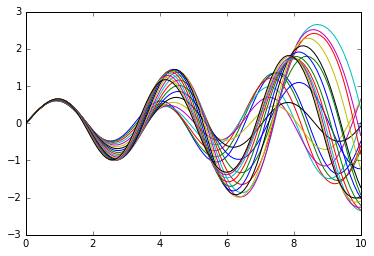

In [61]:
w=arange(1,3.1,0.1)
for i in w:
    t,sol = euler_a(ec_3,[0,1],[0,10],i)
    plot(t,sol[:,0])

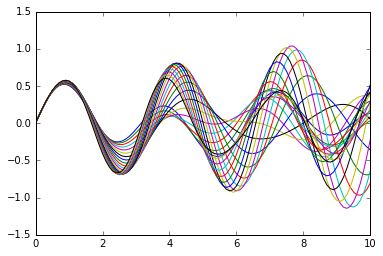

In [65]:
w=arange(1,3.1,0.1)
for i in w:
    t,sol = rk2_a(ec_3,[0,1],[0,10],i)
    plot(t,sol[:,0])

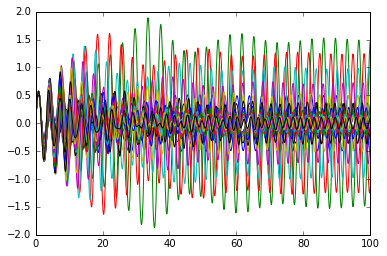

In [67]:
w=arange(1,3.1,0.1)
for i in w:
    t,sol = rk4_a(ec_3,[0,1],[0,100],i)
    plot(t,sol[:,0])

In [ ]:
def euler_tarea(y_ini,v_ini,t_final,h=0.01):
    tiempo = arange(0,t_final+h,h)
    y=zeros(len(tiempo))
    v=zeros(len(tiempo))
    y[0]=y_ini
    v[0]=v_ini
    for i in range(len(tiempo)-1):
        y[i+1] = y[i] + h*v[i]
        v[i+1] = v[i] + h*(0.5*v[i] - sin(y[i] + exp(tiempo[i])*sin(3*tiempo[i])))
    return tiempo,y,v